# Sparse Hebbian Learning: toward a quantitative measure of the quality of filters

We are interested here in learning the "optimal" components of a set of images (let's say some "natural", usual images). As there is no supervisor to guide the learning, this is called unsupervised learning. Our basic hypothesis to find the best ("optimal") components will be to assume that *a priori* the most sparse is more plausible. We will implement the derived algorithm in this set of scripts.



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import pandas as pd

## experiments

To test and control for the role of different parameters, we will have a first object (in the [shl_experiments.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_experiments.py) script) that controls a learning experiment. It contains all relevant parameters, but can also keep a trace of the history of some statistics. This is useful to compare the relative efficiency of the different solutions.


In [3]:
do_random = True # draw new coeff at random
do_random = False # draw new coeff with bootstrap resampling?

do_double_shuffle = True # shuffle accross dictionary elements
do_double_shuffle = False # only shuffles 

l0_sparseness_noise = 200 #shl.n_dictionary #

In [4]:
tag = 'coding'
homeo_methods = ['None', 'HAP', 'HEH']


record_num_batches = 2**12

seed = 42
np.random.seed(seed)

from shl_scripts.shl_experiments import SHL
shl = SHL()
data = shl.get_data(matname=tag)
indx = np.random.permutation(data.shape[0])[:record_num_batches]

list_figures = []

dico = {}
for homeo_method in homeo_methods:
    print(15*'🐶' + homeo_method[:3] + 15*'🐶')
    shl = SHL(homeo_method=homeo_method)
    dico[homeo_method] = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method)


🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶Non🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HAP🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HEH🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶


## coding

The learning itself is done via a gradient descent but is highly dependent on the coding / decoding algorithm. This belongs to a another function (in the [shl_encode.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_encode.py) script)

In [5]:
from shl_scripts.shl_encode import sparse_encode
stick = np.arange(shl.n_dictionary)*shl.nb_quant
P_cum_zeroeffect = np.linspace(0, 1, shl.nb_quant, endpoint=True)[np.newaxis, :] * np.ones((shl.n_dictionary, 1))

for homeo_method in homeo_methods:
    shl = SHL(homeo_method=homeo_method)

    for P_cum_rec, gain_rec in zip([None, P_cum_zeroeffect, dico[homeo_method].P_cum], [np.ones(shl.n_dictionary), None, None]):
        sparse_code = sparse_encode(data[indx, :], dico[homeo_method].dictionary, precision=dico[homeo_method].precision, P_cum=P_cum_rec, C=shl.C, 
                                     l0_sparseness=shl.l0_sparseness, gain=gain_rec)   

        # from shl_scripts.shl_tools import print_stats
        # SD, SE = print_stats(data[indx, :], dico[homeo_method].dictionary, sparse_code)

## Generating new coefficients by shuffling and decoding

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶None🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶


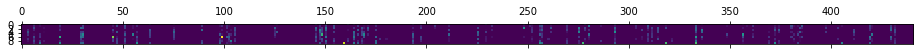

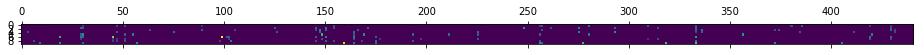

average non-zeros [   7    2    7 2142    1    0 3446   22    3 1778    9 2587    3    5
    1    7    6    5    8 2168   18    7    3    7    1    8   10    1
    8 3527 2805    5    4    2    5   24    2    1   16    1    1    1
   12    0    3 1686    5 2813    6    2    1 3430    7    4    2 1015
  253 2755    1    1    9    8    4 2886    8    6    5    5    9    1
    3    2    4    7    0 2721    4    3   12    3    7    1    4    7
    2    3    7    1    3 2649    2    3   11    4    4    4    1    0
 3336 2138    4 2644 2749 2787   13 3098    4    2   10   10    6   23
   39    1    2    4    5   12    3    7]
average non-zeros [   7    2    7  374    1    0 1445   21    3  254    9  704    3    5
    1    7    6    5    8  393   18    7    3    7    1    8   10    1
    8 1580  799    5    4    2    5   11    2    1   16    1    1    1
   12    0    3  317    5  973    6    2    1 1591    7    4    2  252
   98  854    1    1    9    8    4  881    8    6    5    5    9    1

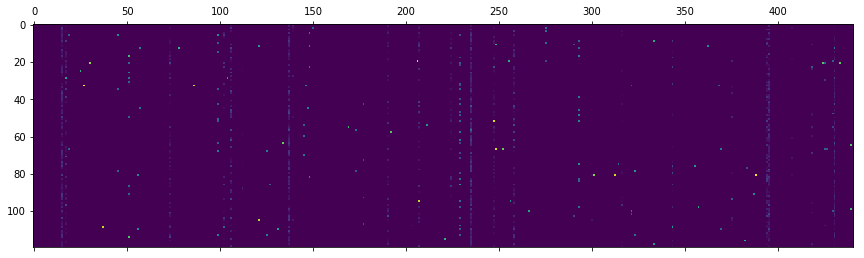

<Figure size 1080x216 with 0 Axes>

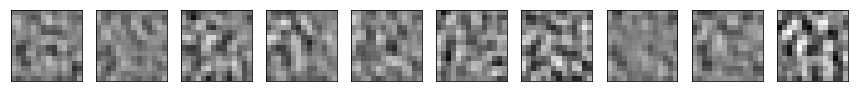

<Figure size 1080x216 with 0 Axes>

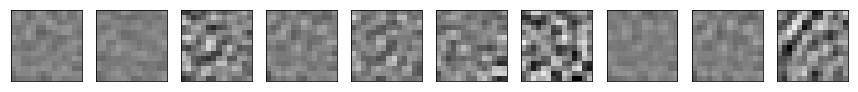

<Figure size 1080x216 with 0 Axes>

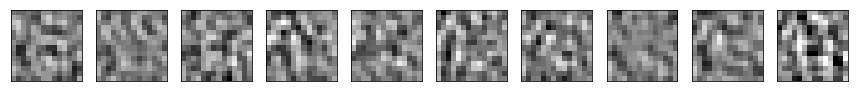

mean deviation of coefficients =  0.04713552354564716 0.02775137258997941 0.010731759263601794
total deviation of coefficients =  0.030268155687606504
mean deviation of quantiles =  0.003322395583958041
mean deviation of quantiles =  0.002273037970721657
total deviation of quantiles =  0.005011123387743904
ratio deviation of quantiles =  1.5082861932335119
proba incorrect coefficients =  0.12187212124433111
proba incorrect coefficients (strong) =  0.047869831526360596
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HAP🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶


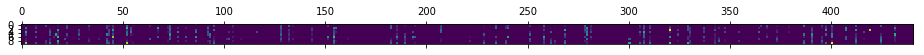

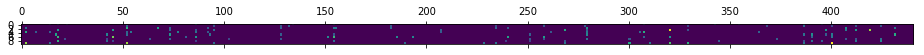

average non-zeros [  78    1 2144   24    4    8    4 2329    3    8    0    6 1529   10
 2866    2 1551  278 3012   14    3  469 3119    4    9    4    7    4
 2728    2    3    6    1 1938    5    6   11    2   72    3    1    3
 2814 2879   22 2892    4   25    3    7    3    6 3281    9 2831 1925
    7    4    4    3    6    8    1 1221    5    1   14 1801    2   10
    1    5  901 3331    8    3    8 1531    2    2    4 1268    8   29
    6    4 1749    4    6    7    2    3 2382 2715   13 3052    6    2
    3    5    3  334  723    4 1787   47    6    6  116    2    5   21
  121    9   37    3  491    1   13    5]
average non-zeros [  41    1  409   19    4    8    4  478    3    8    0    6  247   10
  864    2  209  266 1025   14    3  324 1291    4    9    4    7    4
  696    2    3    6    1  355    5    6   11    2   45    3    1    3
  907  953   20  689    4   25    3    7    3    6 1222    9  825  277
    7    4    4    3    6    8    1  512    5    1   14  391    2   10

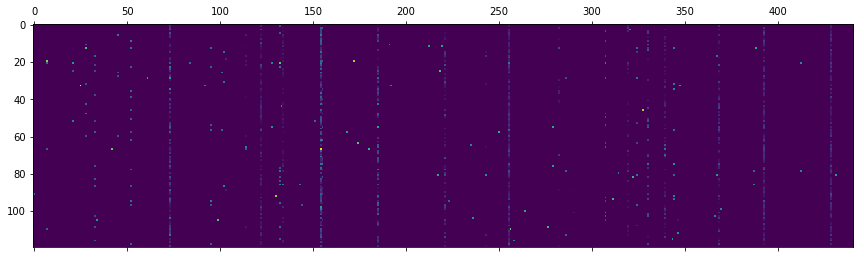

<Figure size 1080x216 with 0 Axes>

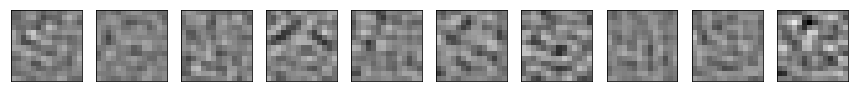

<Figure size 1080x216 with 0 Axes>

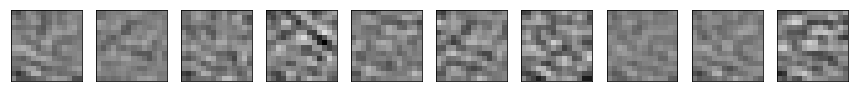

<Figure size 1080x216 with 0 Axes>

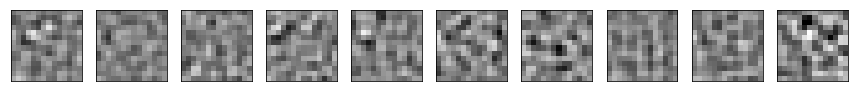

mean deviation of coefficients =  0.04744798087240483 0.028250770386411234 0.013884670174249285
total deviation of coefficients =  0.030407847802288467
mean deviation of quantiles =  0.0033224531824937575
mean deviation of quantiles =  0.0023339907354801683
total deviation of quantiles =  0.004566009462640175
ratio deviation of quantiles =  1.3742885789027228
proba incorrect coefficients =  0.11006091889880953
proba incorrect coefficients (strong) =  0.044200525262188206
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HEH🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶


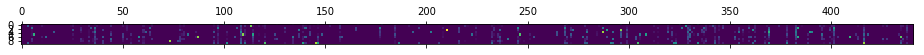

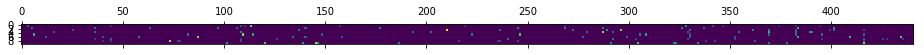

average non-zeros [1204  149  419  190   25 1665   45   19  127   26 1390   66   75   13
   17   41  184  106   33   54   34   39  260   30   65 2205   43   36
   41 3209  435   69  132 2284  243 1582 3735  845   49  773 2958  477
  243   49 3027   64   44  106  176   62 2849   98 2012   33 2158  109
   31   22 1564 1091 2407  362   49 1121 1244   72  111  261   32   42
   47   12   35   86  119   31  134   38 3331 2486 1542   45   96  109
   75  118 1483   82   30   22  136   33   31   26   39 1997   33 2850
   43   49  319 2035   31  131   23  394  198   40 3447  294 2519   89
   35  102 2877   26   77  970  107   51]
average non-zeros [  98  109  132  121   25  111   45   19  102   26  142   39   68   13
   17   41  144  101   31   53   34   39   16   30   54  295   42   35
   39  634   54   64  119  247  147  120 1075  166   48  110  526  180
  152   47  680   61   43   60  124   62  332   94  136   33  180   93
   31   22  142   64  304  147   38  207  191   63  107  164   22   41

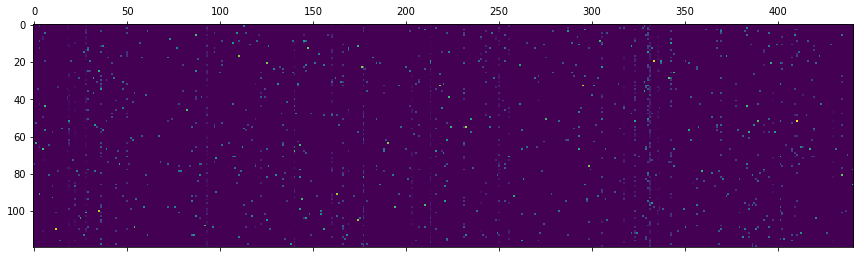

<Figure size 1080x216 with 0 Axes>

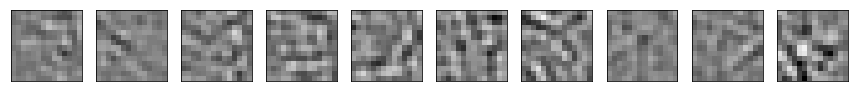

<Figure size 1080x216 with 0 Axes>

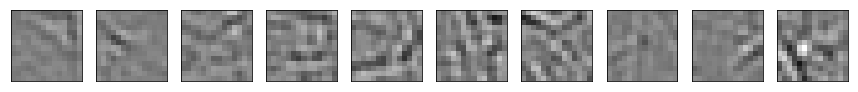

<Figure size 1080x216 with 0 Axes>

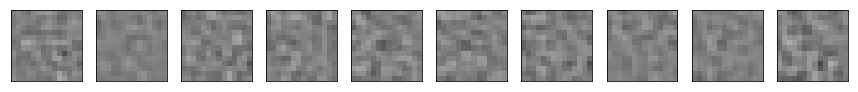

mean deviation of coefficients =  0.05963712194570993 0.030510438423930596 0.025297753898695312
total deviation of coefficients =  0.027678339015249603
mean deviation of quantiles =  0.0033358025171970275
mean deviation of quantiles =  0.003147957379519173
total deviation of quantiles =  0.004007637696810612
ratio deviation of quantiles =  1.2014013647840602
proba incorrect coefficients =  0.1465541294642857
proba incorrect coefficients (strong) =  0.03819112280328796


In [6]:
def shuffling(data, sparse_code, dico, N_show=10):
    if do_random:
        from shl_scripts.shl_encode import inv_quantile, inv_rescaling
        sparse_code_bar = inv_rescaling(inv_quantile(dico.P_cum, np.random.rand(sparse_code.shape[0], sparse_code.shape[1])), C=shl.C)
    else:
        sparse_code = sparse_encode(data, dico.dictionary, precision=dico.precision, P_cum=dico.P_cum, C=shl.C, 
                                     l0_sparseness=l0_sparseness_noise, gain=None)   

        sparse_code_bar = sparse_code.copy()
        
        sparse_code_bar = sparse_code_bar.T
        np.random.shuffle(sparse_code_bar)
        sparse_code_bar = sparse_code_bar.T
        
        if do_double_shuffle:
            np.random.shuffle(sparse_code_bar)

    plt.matshow(sparse_code_bar[:N_show, :])
    plt.show()

    def threshold(sparse_code, l0_sparseness):
        thr = np.percentile(sparse_code, 100 * (1 - l0_sparseness/shl.n_dictionary ), axis=1)
        return (sparse_code>thr[:, np.newaxis])

    sparse_code_bar_high = threshold(sparse_code_bar, shl.l0_sparseness) * sparse_code_bar
    plt.matshow(sparse_code_bar_high[:N_show, :])
    plt.show()
    return sparse_code_bar, sparse_code_bar_high

def pipeline(sparse_code_bar, sparse_code_bar_high, dico, index, N_show=120):

    patches_bar = sparse_code_bar @ dico.dictionary
    SD = np.sqrt(np.mean(patches_bar**2, axis=1))


    P_cum_rec = dico.P_cum
    gain_rec = None

    sparse_code_rec = sparse_encode(patches_bar, dico.dictionary, precision=dico.precision, P_cum=P_cum_rec, C=shl.C, 
                                     l0_sparseness=shl.l0_sparseness, gain=gain_rec)   

    print('average non-zeros', np.count_nonzero(sparse_code_bar, axis=0)[:N_show])
    print('average non-zeros', np.count_nonzero(sparse_code_bar_high, axis=0)[:N_show])
    print('average non-zeros', np.count_nonzero(sparse_code_rec, axis=0)[:N_show])
    
    from shl_scripts.shl_tools import print_stats
    SD, SE = print_stats(patches_bar, dico.dictionary, sparse_code_rec, verbose=False, display=True)
    #plt.matshow(sparse_code_rec[:N_show, :])
    plt.show()

    print('mean deviation of coefficients = ', np.mean(np.abs(sparse_code_bar)), np.mean(np.abs(sparse_code_bar_high)), np.mean(np.abs(sparse_code_rec)))
    print('total deviation of coefficients = ', np.mean(np.abs(sparse_code_bar_high-sparse_code_rec)))

    from shl_scripts.shl_encode import quantile, rescaling

    q_rec = quantile(dico.P_cum, rescaling(sparse_code_rec, C=shl.C), stick, do_fast=False)
    q_bar = quantile(dico.P_cum, rescaling(sparse_code_bar_high, C=shl.C), stick, do_fast=False)

    print('mean deviation of quantiles = ', np.mean(np.abs(q_bar)))
    print('mean deviation of quantiles = ', np.mean(np.abs(q_rec)))
    print('total deviation of quantiles = ', np.mean(np.abs(q_bar-q_rec)))
    print('ratio deviation of quantiles = ', np.mean(np.abs(q_bar-q_rec))/np.mean(np.abs(q_bar)))
    aerror = np.mean(np.abs(q_bar-q_rec))/np.mean(np.abs(q_bar))

    perror = 1 - np.mean( (sparse_code_bar>0) == (sparse_code_rec>0))
    print('proba incorrect coefficients = ', perror)

    perror_high = 1 - np.mean( (sparse_code_bar_high > 0) == (sparse_code_rec>0))
    print('proba incorrect coefficients (strong) = ', perror_high)
    
    return pd.DataFrame({'error':[(SD/SE).mean()],
                               'aerror':[aerror],
                               'perror':[perror],
                               'perror_high':[perror_high]
                                        },
                                index=[index])

record = None
for homeo_method in homeo_methods:
    print(15*'🐶' + homeo_method + 15*'🐶')
    
    shl = SHL(homeo_method=homeo_method)

    sparse_code_bar, sparse_code_bar_high = shuffling(data[indx, :], sparse_code, dico[homeo_method])
    record_ = pipeline(sparse_code_bar, sparse_code_bar_high, dico[homeo_method], index=homeo_method)
    if record is None:
        record = record_
    else:
        record = pd.concat((record, record_))


In [7]:
record

,error,aerror,perror,perror_high
None,1.231728,1.508286,0.121872,0.047870
HAP,1.310580,1.374289,0.110061,0.044201
HEH,1.957108,1.201401,0.146554,0.038191


In [8]:
record_

,error,aerror,perror,perror_high
HEH,1.957108,1.201401,0.146554,0.038191


## Version used

In [9]:
%load_ext version_information
%version_information shl_scripts, numpy, shl_scripts, pandas, matplotlib

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)]
IPython 6.5.0
OS Darwin 17.7.0 x86_64 i386 64bit
shl_scripts 20171221
numpy 1.15.1
shl_scripts 20171221
pandas 0.23.4
matplotlib 3.0.0
Tue Sep 25 12:04:34 2018 CEST